In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Data

In [2]:
seed = 1
N = 100
r_high = 5
rmin,rmax = -r_high, r_high
MAX_ITERATION = 150

In [3]:
from kerasy.utils.data_generator import generateWholeCakes
from kerasy.ML.svm import BaseSVM

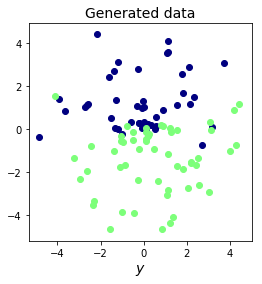

In [4]:
train_x, train_y = generateWholeCakes(2, N, r_high=r_high, seed=seed, same=False, plot=True, figsize=(4,4))

In [5]:
train_y = BaseSVM.formatting_y(train_y)

Convert 0 to -1 to suit for the SVM train data format.
Convert 1 to  1 to suit for the SVM train data format.


## hard SVM

In [6]:
from kerasy.ML.svm import hardSVC

In [7]:
kernels = [
    "linear","polynomial","gaussian",
    "sigmoid","laplacian","inverse_multiquadric"
]

In [8]:
X,Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

kernel: linear
150/150 [####################] 100.00% - 56.006s  Rate of Support Vector = 21.0%
kernel: polynomial
150/150 [####################] 100.00% - 103.779s  Rate of Support Vector = 36.0%
kernel: gaussian
150/150 [####################] 100.00% - 127.100s  Rate of Support Vector = 27.0%
kernel: sigmoid
150/150 [####################] 100.00% - 74.621s  Rate of Support Vector = 24.0%
kernel: laplacian
150/150 [####################] 100.00% - 178.511s  Rate of Support Vector = 42.0%
kernel: inverse_multiquadric
150/150 [####################] 100.00% - 102.480s  Rate of Support Vector = 25.0%


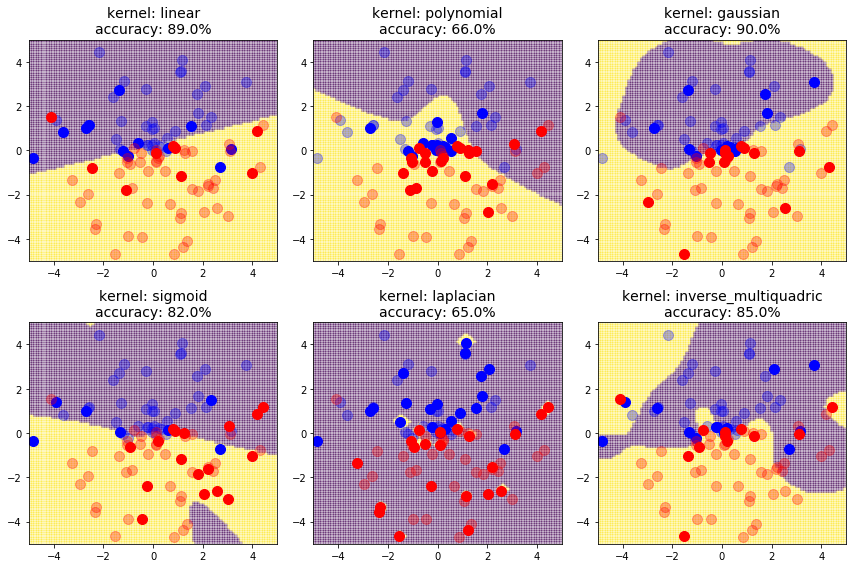

In [9]:
n_fig = len(kernels)
n_col = 3
n_row = n_fig//n_col if n_fig%n_col==0 else n_fig//n_col+1

fig = plt.figure(figsize=(4*n_col,4*n_row))
for i,kernel in enumerate(kernels):
    ax = fig.add_subplot(n_row,n_col,i+1)
    print(f"kernel: {kernel}")
    model = hardSVC(kernel=kernel)
    model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
    
    Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y) == 1
    ax.pcolor(X, Y, Z, alpha=0.3)
    for i in range(N):
        alpha = 1 if i in model.isSV() else 0.3
        color = "red" if train_y[i]==1 else "blue"
        ax.plot(train_x[i,0], train_x[i,1], marker="o", color=color, markersize=10, alpha=alpha)
    ax.set_title(f"kernel: {kernel}\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
    ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
plt.tight_layout()
plt.show()

## Soft SVM

In [10]:
from kerasy.ML.svm import SVC

In [11]:
params = [
    (1e-2,1e-2),(1e-2,1e0),(1e-2,1e2),
    (1e1, 1e-2),(1e1, 1e0),(1e1, 1e2),
    (1e4, 1e-2),(1e4, 1e0),(1e4, 1e2),
]

C=0.01, sigma=0.01
002/150 [--------------------]   1.33% - 0.721s  Rate of Support Vector = 63.0%
C=0.01, sigma=1.0
011/150 [#-------------------]   7.33% - 4.957s  Rate of Support Vector = 65.0%
C=0.01, sigma=100.0
003/150 [--------------------]   2.00% - 1.596s  Rate of Support Vector = 67.0%
C=10.0, sigma=0.01
039/150 [#####---------------]  26.00% - 67.010s  Rate of Support Vector = 68.0%
C=10.0, sigma=1.0
009/150 [#-------------------]   6.00% - 7.817s  Rate of Support Vector = 66.0%
C=10.0, sigma=100.0
018/150 [##------------------]  12.00% - 14.564s  Rate of Support Vector = 72.0%
C=10000.0, sigma=0.01
011/150 [#-------------------]   7.33% - 15.664s  Rate of Support Vector = 71.0%
C=10000.0, sigma=1.0
015/150 [##------------------]  10.00% - 14.952s  Rate of Support Vector = 67.0%
C=10000.0, sigma=100.0
003/150 [--------------------]   2.00% - 1.620s  Rate of Support Vector = 72.0%


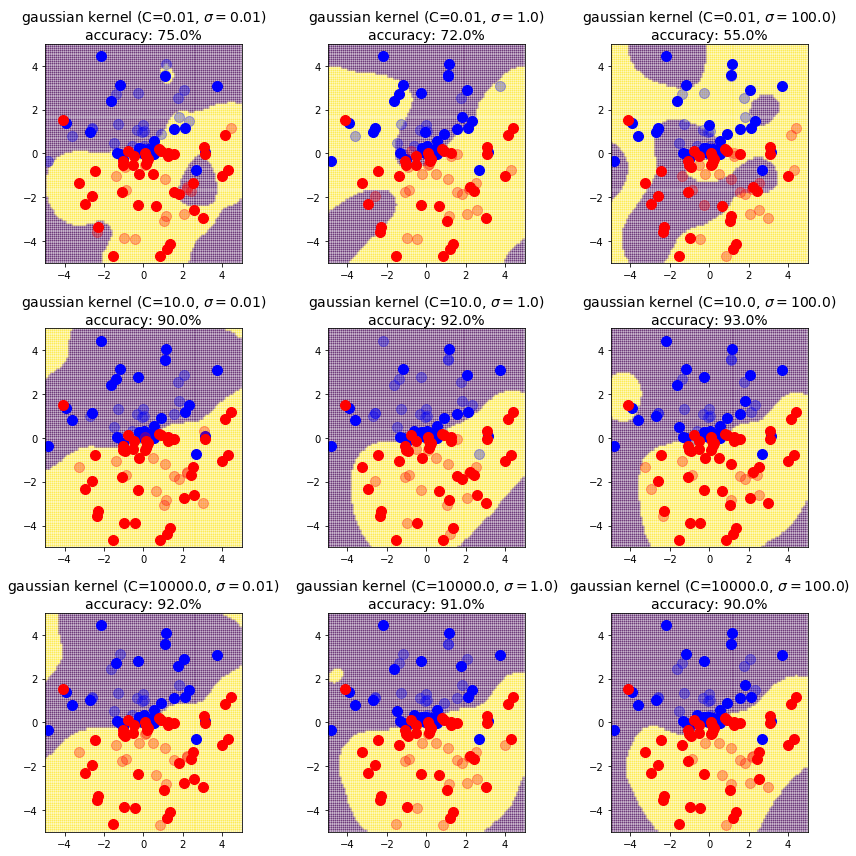

In [12]:
n_fig = len(params)
n_col = 3
n_row = n_fig//n_col if n_fig%n_col==0 else n_fig//n_col+1

fig = plt.figure(figsize=(4*n_col,4*n_row))
for i,(C,sigma) in enumerate(params):
    ax = fig.add_subplot(n_row,n_col,i+1)
    print(f"C={C}, sigma={sigma}")
    model = SVC(kernel="gaussian",C=C,sigma=sigma)
    model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
    
    Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y) == 1
    ax.pcolor(X, Y, Z, alpha=0.3)
    for i in range(N):
        alpha = 1 if i in model.isSV() else 0.3
        color = "red" if train_y[i]==1 else "blue"
        ax.plot(train_x[i,0], train_x[i,1], marker="o", color=color, markersize=10, alpha=alpha)
    ax.set_title(f"gaussian kernel (C={C}, $\sigma={sigma}$)\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
    ax.set_xlim(rmin,rmax), ax.set_ylim(rmin,rmax)
plt.tight_layout()
plt.show()

## Multiple SVM (Soft)

In [13]:
C,sigma = (1e1, 1e-2)

In [14]:
from kerasy.ML.svm import MultipleSVM

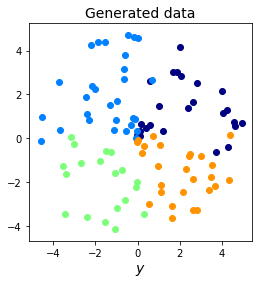

In [15]:
train_x, train_y = generateWholeCakes(4, N, same=False, plot=True, seed=seed, figsize=(4,4))

[0 vs others]
056/150 [#######-------------]  37.33% - 103.562s  Rate of Support Vector = 63.0%
[1 vs others]
045/150 [#####---------------]  30.00% - 71.896s  Rate of Support Vector = 59.0%
[2 vs others]
022/150 [##------------------]  14.67% - 17.670s  Rate of Support Vector = 34.0%
[3 vs others]
101/150 [#############-------]  67.33% - 177.391s  Rate of Support Vector = 62.0%


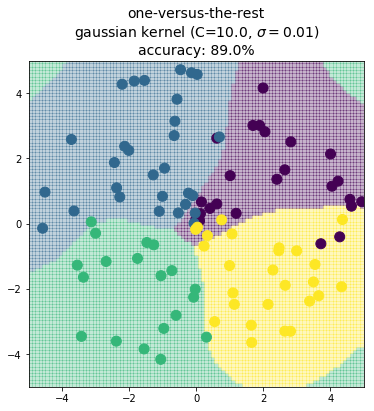

In [16]:
model = MultipleSVM(kernel="gaussian", C=C, sigma=sigma)
model.fit(train_x, train_y, max_iter=MAX_ITERATION, sparse_memorize=False)
Z = np.vectorize(lambda x,y: model.predict(np.array([x,y]).reshape(1,-1)))(X, Y)

plt.figure(figsize=(6,6))
plt.pcolor(X, Y, Z, alpha=0.3)
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, s=100)
plt.title(f"one-versus-the-rest\ngaussian kernel (C={C}, $\sigma={sigma}$)\naccuracy: {100*model.accuracy(train_x, train_y):.1f}%", fontsize=14)
plt.xlim(rmin,rmax), plt.ylim(rmin,rmax)
plt.show()